# Online Shoppers Purchasing Intention

In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from scipy.special import ndtri
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile

#### Importing the dataset

In [3]:
path = os.path.join('Resources', 'online_shoppers_intention.csv')

In [4]:
OSHIdf = pd.read_csv(path)

In [5]:

OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

##### Getting to know the data

In [7]:

OSHIdf.shape

(12330, 18)

In [8]:
OSHIdf.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
OSHIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### Data Summary 

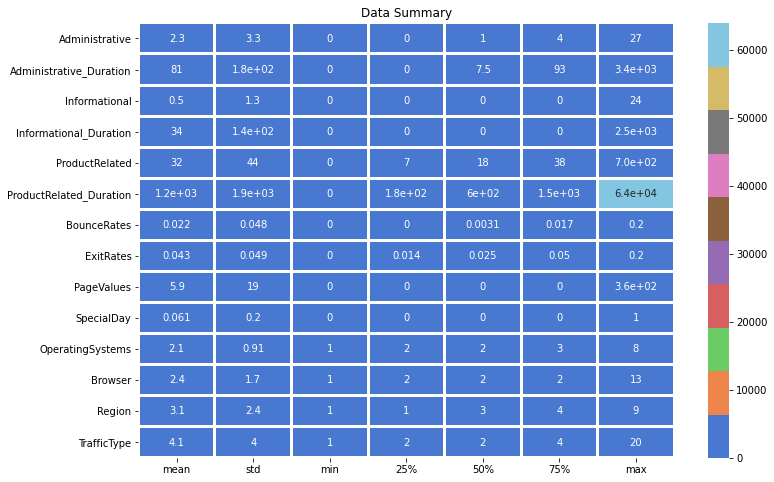

In [10]:

plt.figure(figsize = (12,8))
sns.heatmap(OSHIdf.describe()[1:].transpose(),
            annot=True,linecolor = "w",
            linewidth=2, cmap=sns.color_palette("muted"))
plt.title("Data Summary")
plt.show()

### Detecting missing values

In [11]:
OSHIdf.isna().sum().sum()

0

In [12]:
OSHIdf.isnull().sum().sum()

0

# Initial Analysis 

### Univarialte Analysis 

#### Checking the ditribution of numeric features 

Text(0, 0.5, 'Count of Users')

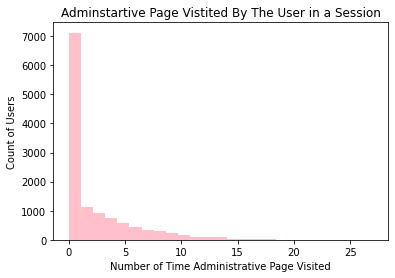

In [13]:
#Administrative 
hist_plot_Administartive = OSHIdf['Administrative'].hist(bins = 25, grid = False, color = "pink")
hist_plot_Administartive.set_title('Adminstartive Page Vistited By The User in a Session')
hist_plot_Administartive.set_xlabel('Number of Time Administrative Page Visited')
hist_plot_Administartive.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

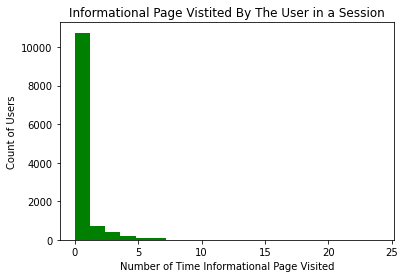

In [14]:
#Informational
hist_plot_Informational = OSHIdf['Informational'].hist(bins = 20, grid = False, color = "green")
hist_plot_Informational.set_title('Informational Page Vistited By The User in a Session')
hist_plot_Informational.set_xlabel('Number of Time Informational Page Visited')
hist_plot_Informational.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

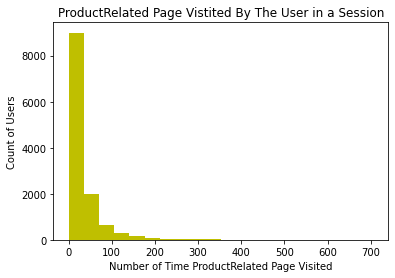

In [15]:
#ProductRelated
hist_plot_ProductRelated = OSHIdf['ProductRelated'].hist(bins = 20, grid = False, color = "y")
hist_plot_ProductRelated.set_title('ProductRelated Page Vistited By The User in a Session')
hist_plot_ProductRelated.set_xlabel('Number of Time ProductRelated Page Visited')
hist_plot_ProductRelated.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

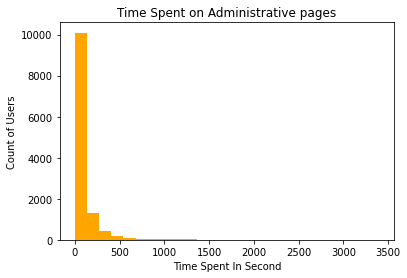

In [16]:
#Administrative_Duration
hist_plot_Administrative_Duration = OSHIdf['Administrative_Duration'].hist(bins = 25, grid = False, color = "orange")
hist_plot_Administrative_Duration.set_title('Time Spent on Administrative pages')
hist_plot_Administrative_Duration.set_xlabel('Time Spent In Second')
hist_plot_Administrative_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

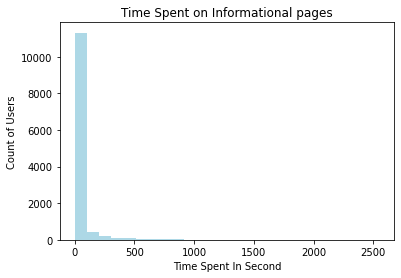

In [17]:
#Informational_Duration'
hist_plot_Informational_Duration = OSHIdf['Informational_Duration'].hist(bins = 25, grid = False, color = "lightblue")
hist_plot_Informational_Duration.set_title('Time Spent on Informational pages')
hist_plot_Informational_Duration.set_xlabel('Time Spent In Second')
hist_plot_Informational_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

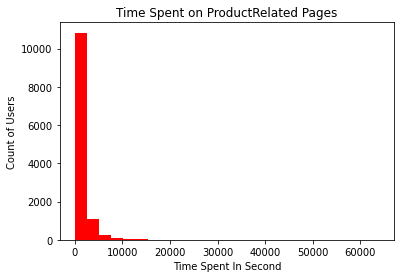

In [18]:
#ProductRelated_Duration
hist_plot_ProductRelated_Duration = OSHIdf['ProductRelated_Duration'].hist(bins = 25, grid = False, color = "r")
hist_plot_ProductRelated_Duration.set_title('Time Spent on ProductRelated Pages')
hist_plot_ProductRelated_Duration.set_xlabel('Time Spent In Second')
hist_plot_ProductRelated_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

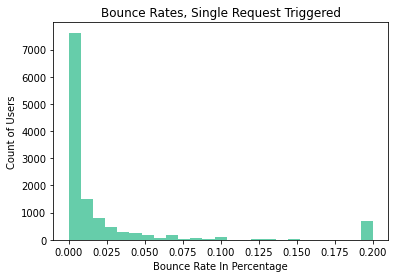

In [19]:
#BounceRates
hist_plot_BounceRates = OSHIdf['BounceRates'].hist(bins = 25, grid = False, color = "mediumaquamarine")
hist_plot_BounceRates.set_title('Bounce Rates, Single Request Triggered')
hist_plot_BounceRates.set_xlabel('Bounce Rate In Percentage')
hist_plot_BounceRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

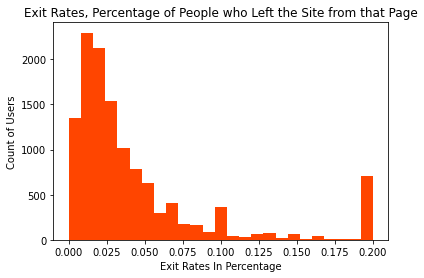

In [20]:
#Exit Rates
hist_plot_ExitRates = OSHIdf['ExitRates'].hist(bins = 25, grid = False, color = "orangered")
hist_plot_ExitRates.set_title('Exit Rates, Percentage of People who Left the Site from that Page')
hist_plot_ExitRates.set_xlabel('Exit Rates In Percentage')
hist_plot_ExitRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

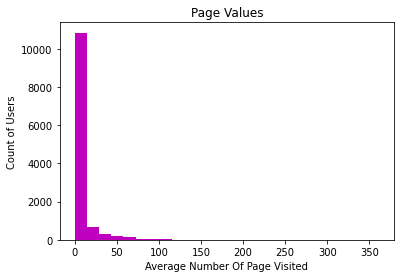

In [21]:
#Page Values
hist_plot_PageValues = OSHIdf['PageValues'].hist(bins = 25, grid = False, color = "m")
hist_plot_PageValues.set_title('Page Values')
hist_plot_PageValues.set_xlabel('Average Number Of Page Visited')
hist_plot_PageValues.set_ylabel('Count of Users')

In [22]:
OSHIdf['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Text(0, 0.5, 'Count of SpecialDay')

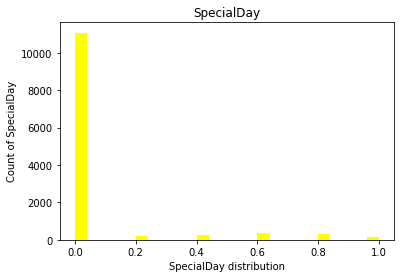

In [23]:
#Page Values
hist_plot_SpecialDay = OSHIdf['SpecialDay'].hist(bins = 25, grid = False, color = "yellow")
hist_plot_SpecialDay.set_title('SpecialDay')
hist_plot_SpecialDay.set_xlabel('SpecialDay distribution')
hist_plot_SpecialDay.set_ylabel('Count of SpecialDay')

#### Frequency table and visulization of categorical variables 

In [24]:
#Operating systems 
Operatingsystems_frequency_table = pd.crosstab(index = OSHIdf["OperatingSystems"], columns = "Count")
Operatingsystems_frequency_table

col_0,Count
OperatingSystems,
1,2585
2,6601
3,2555
4,478
5,6
6,19
7,7
8,79


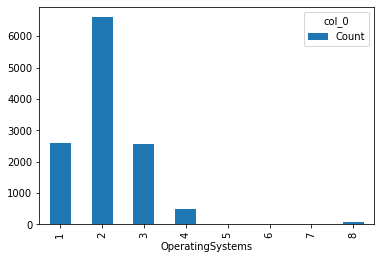

In [25]:
Operatingsystems_frequency_table.plot.bar()

In [26]:
Browser_frequency_table = pd.crosstab(index = OSHIdf["Browser"], columns = "Count")
Browser_frequency_table

col_0,Count
Browser,
1,2462
2,7961
3,105
4,736
5,467
6,174
7,49
8,135
9,1


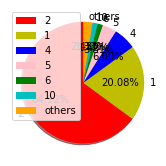

In [27]:
#Percentage of different browsers
size = [7961, 2462, 736, 467, 174, 163, 300]
colors = ['r', 'y', 'b', 'pink', 'g', 'c', 'orange']
labels = "2", "1", "4", "5", "6", "10", "others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.axis('off')
plt.legend()
plt.show()

In [28]:
#Region
Region_frequency_table = pd.crosstab(index=OSHIdf["Region"], columns = "count")
Region_frequency_table

col_0,count
Region,
1,4780
2,1136
3,2403
4,1182
5,318
6,805
7,761
8,434
9,511


Text(0, 0.5, 'count')

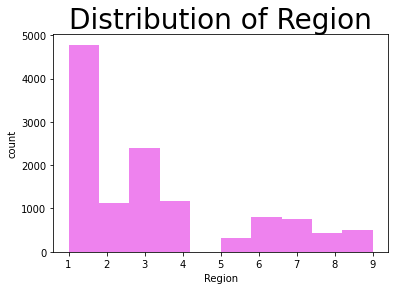

In [29]:
plt.hist(OSHIdf["Region"], color = "violet")
plt.title("Distribution of Region", fontsize = 28)
plt.xlabel("Region")
plt.ylabel("count")

In [30]:
Traffictype_frequency_table = pd.crosstab(index = OSHIdf["TrafficType"], columns = "Count")
Traffictype_frequency_table

col_0,Count
TrafficType,
1,2451
2,3913
3,2052
4,1069
5,260
6,444
7,40
8,343
9,42


Text(0, 0.5, 'count')

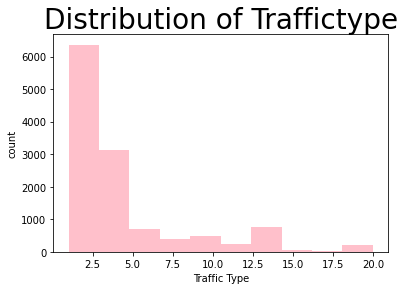

In [31]:
plt.hist(OSHIdf["TrafficType"], color = "Pink")
plt.title("Distribution of Traffictype", fontsize = 28)
plt.xlabel("Traffic Type")
plt.ylabel("count")

In [32]:
#Visitor type 
Visitortype_frequency_table = pd.crosstab(index = OSHIdf["VisitorType"], columns = "Count")
Visitortype_frequency_table

col_0,Count
VisitorType,
New_Visitor,1694
Other,85
Returning_Visitor,10551


In [33]:
Visitortype_frequency_table/Visitortype_frequency_table.sum()

col_0,Count
VisitorType,
New_Visitor,0.137388
Other,0.006894
Returning_Visitor,0.855718


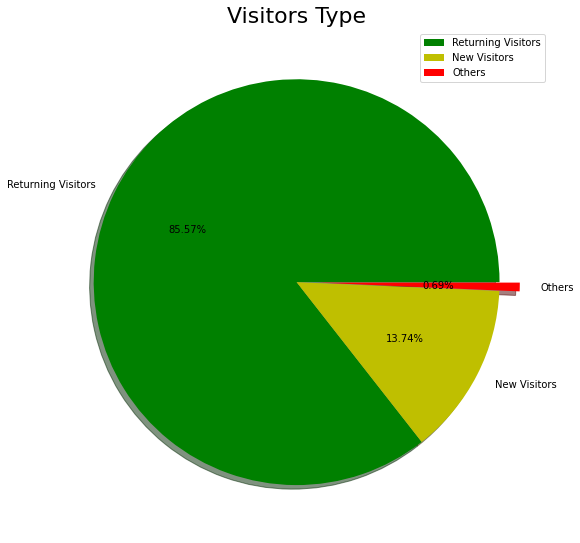

In [34]:
#Percentage of different Visitors type in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [10551, 1694, 85]
colors = ["g", "y", "r"]
labels = "Returning Visitors", "New Visitors", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title("Visitors Type", fontsize = 22)
plt.axis("off")
plt.legend()

In [35]:
#Weekend
pd.crosstab(index = OSHIdf["Weekend"], columns = "Count")

col_0,Count
Weekend,
False,9462
True,2868


Weekdays: 9462
weekend: 2868


<function matplotlib.pyplot.show(*args, **kw)>

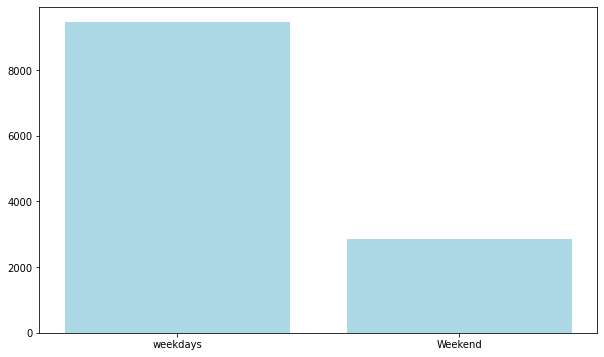

In [36]:
plt.figure(figsize =(10, 6))
print("Weekdays:", len(OSHIdf[OSHIdf.Weekend == 0]))
print("weekend:", len(OSHIdf[OSHIdf.Weekend == 1]))
y = len(OSHIdf[OSHIdf.Weekend == 0]), len(OSHIdf[OSHIdf.Weekend == 1])
x = ["weekdays", "Weekend"]
plt.bar(x, y, color = "lightblue")
plt.show

In [37]:
#Month
pd.crosstab(index = OSHIdf["Month"], columns = "Count")

col_0,Count
Month,
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


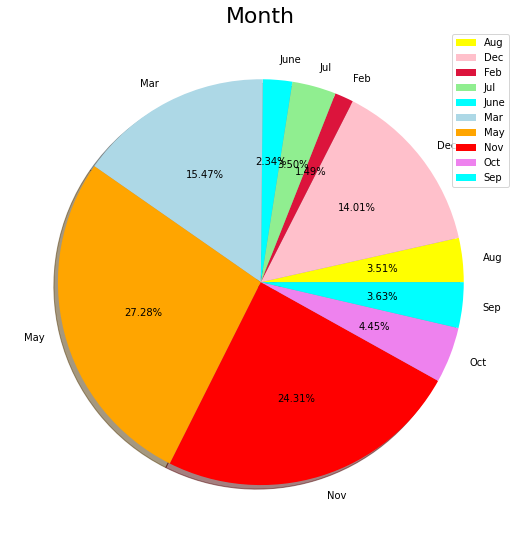

In [38]:
#Percentage of different Month in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [433, 1727, 184, 432, 288, 1907, 3364, 2998, 549, 448]
colors = ["yellow", "pink", "crimson", "lightgreen", "cyan", "lightblue", "orange", "red", "violet", "cyan"]
labels = "Aug", "Dec", "Feb", "Jul", "June", "Mar", "May", "Nov", "Oct", "Sep"
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title("Month", fontsize = 22)
plt.axis("off")
plt.legend()

In [39]:
#frequency table for Revenue 
pd.crosstab(index = OSHIdf["Revenue"], columns = "Count")

col_0,Count
Revenue,
False,10422
True,1908


Did not buy: 10422
Bought: 1908


<function matplotlib.pyplot.show(*args, **kw)>

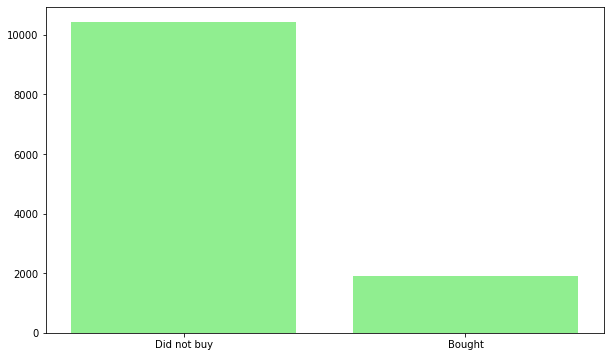

In [40]:
#Plotting the Revenue 
plt.figure(figsize =(10, 6))
print("Did not buy:", len(OSHIdf[OSHIdf.Revenue == 0]))
print("Bought:", len(OSHIdf[OSHIdf.Revenue == 1]))
y = len(OSHIdf[OSHIdf.Revenue == 0]), len(OSHIdf[OSHIdf.Revenue == 1])
x = ["Did not buy", "Bought"]
plt.bar(x, y, color = "lightgreen")
plt.show 

### Bivariate Analysis 

Text(0, 0.5, 'Revenue')

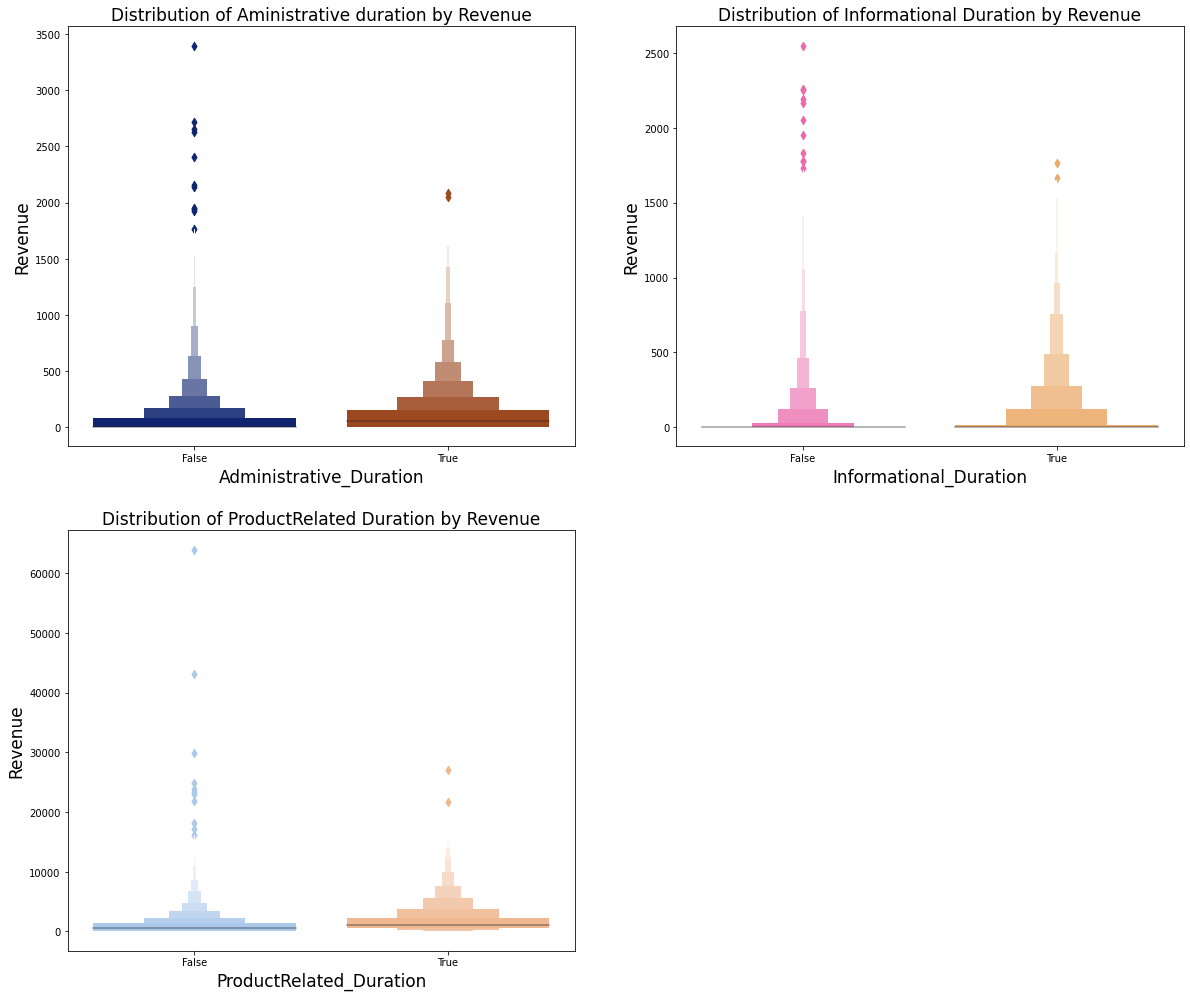

In [41]:
plt.rcParams['figure.figsize'] = (20, 17)

#Distribution of Administrative duration by Revenue 
plt.subplot(2, 2, 1)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['Administrative_Duration'], palette = 'dark')
plt.title('Distribution of Aministrative duration by Revenue', fontsize = 17)
plt.xlabel('Administrative_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of Informational duration by Revenue 
plt.subplot(2, 2, 2)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['Informational_Duration'], palette = 'spring')
plt.title('Distribution of Informational Duration by Revenue', fontsize = 17)
plt.xlabel('Informational_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of ProductRelated pages by Revenue
plt.subplot(2, 2, 3)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['ProductRelated_Duration'], palette = 'pastel')
plt.title('Distribution of ProductRelated Duration by Revenue', fontsize = 17)
plt.xlabel('ProductRelated_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)


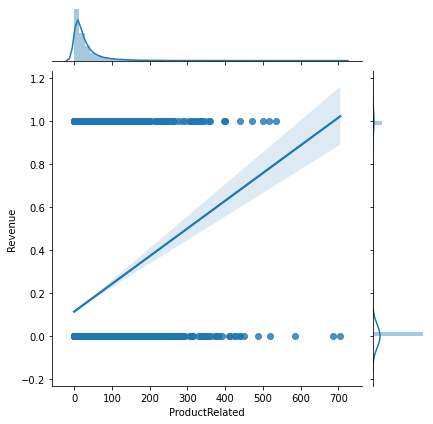

In [42]:
sns.jointplot(x ='ProductRelated', y='Revenue', data=OSHIdf, kind = 'reg')

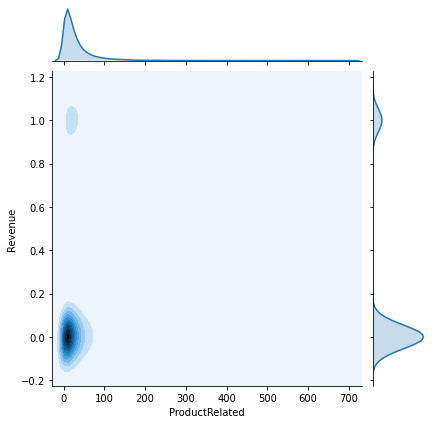

In [43]:
sns.jointplot(x ='ProductRelated', y='Revenue', data=OSHIdf, kind = 'kde')

Text(0, 0.5, 'Revenue')

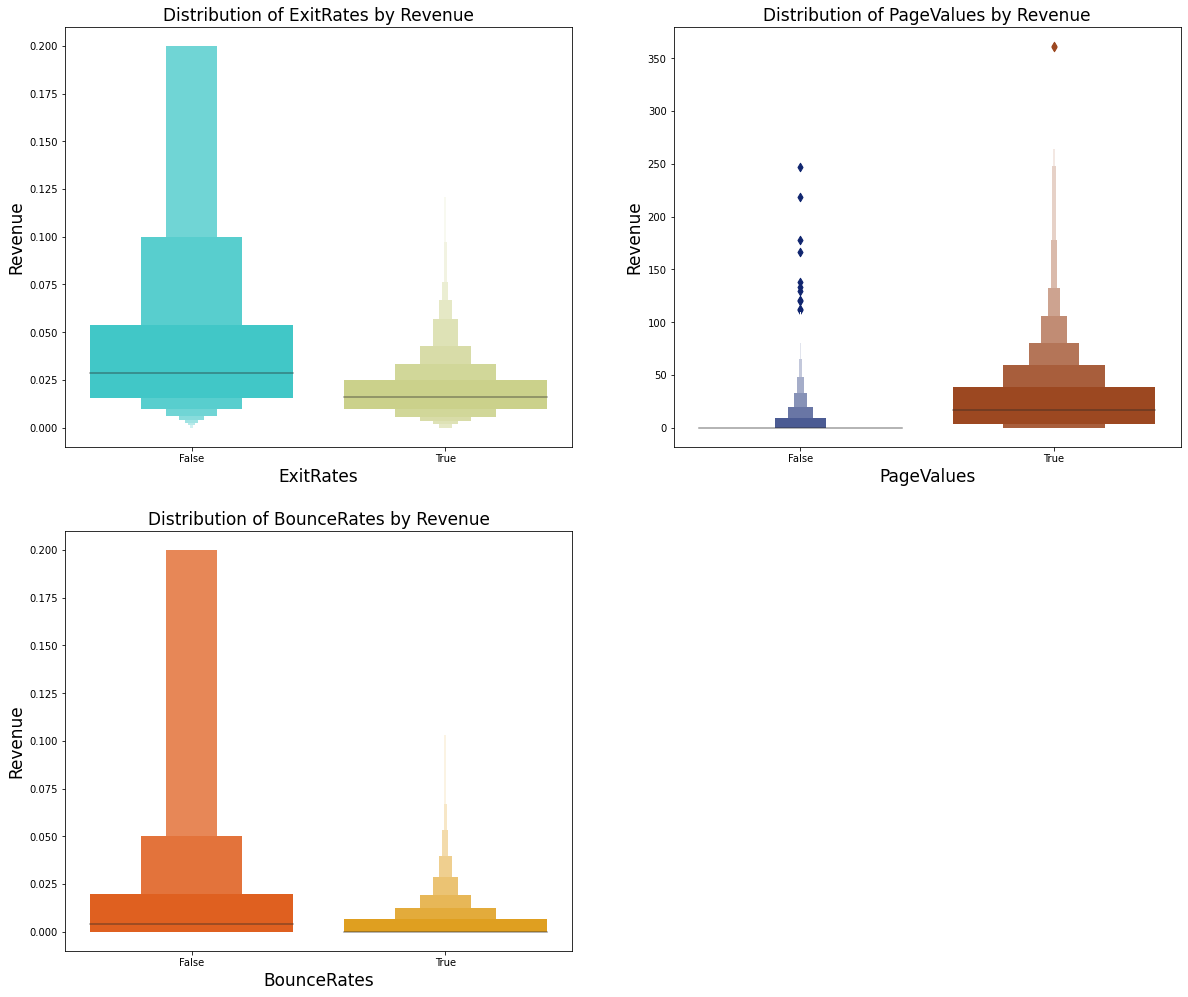

In [44]:
#Distribution of ExitRates by Revenue 
plt.subplot(2, 2, 1)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['ExitRates'], palette = 'rainbow')
plt.title('Distribution of ExitRates by Revenue', fontsize = 17)
plt.xlabel('ExitRates', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of PageValues by Revenue 
plt.subplot(2, 2,2)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['PageValues'], palette = 'dark')
plt.title('Distribution of PageValues by Revenue', fontsize = 17)
plt.xlabel('PageValues', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of BounceRates by Revenue
plt.subplot(2, 2, 3)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['BounceRates'], palette = 'autumn')
plt.title('Distribution of BounceRates by Revenue', fontsize = 17)
plt.xlabel('BounceRates', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

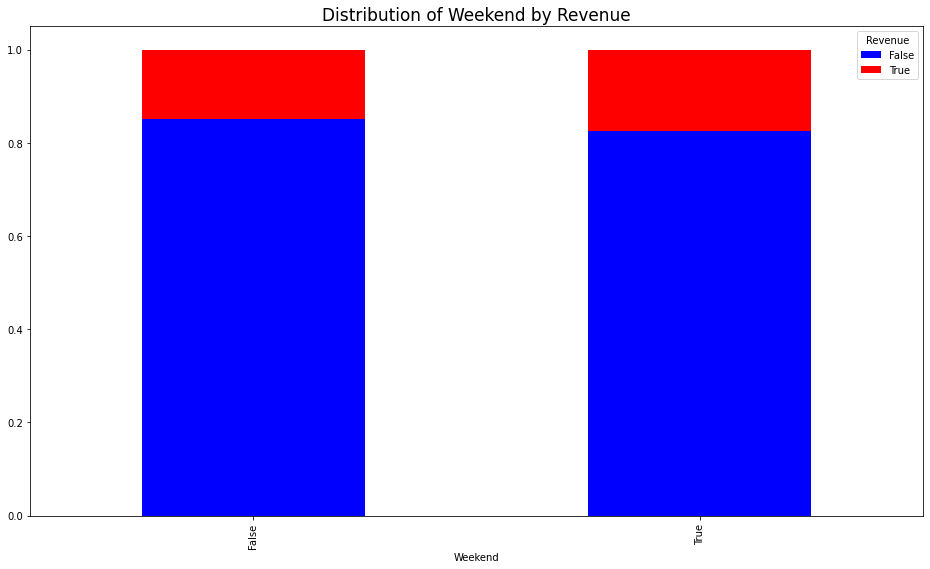

In [45]:
#Distribution of Weekend by Revenue
OSHIdf = pd.crosstab(OSHIdf['Weekend'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (16, 9), color = ['blue', 'red'])
plt.title('Distribution of Weekend by Revenue', fontsize = 17)
plt.show()

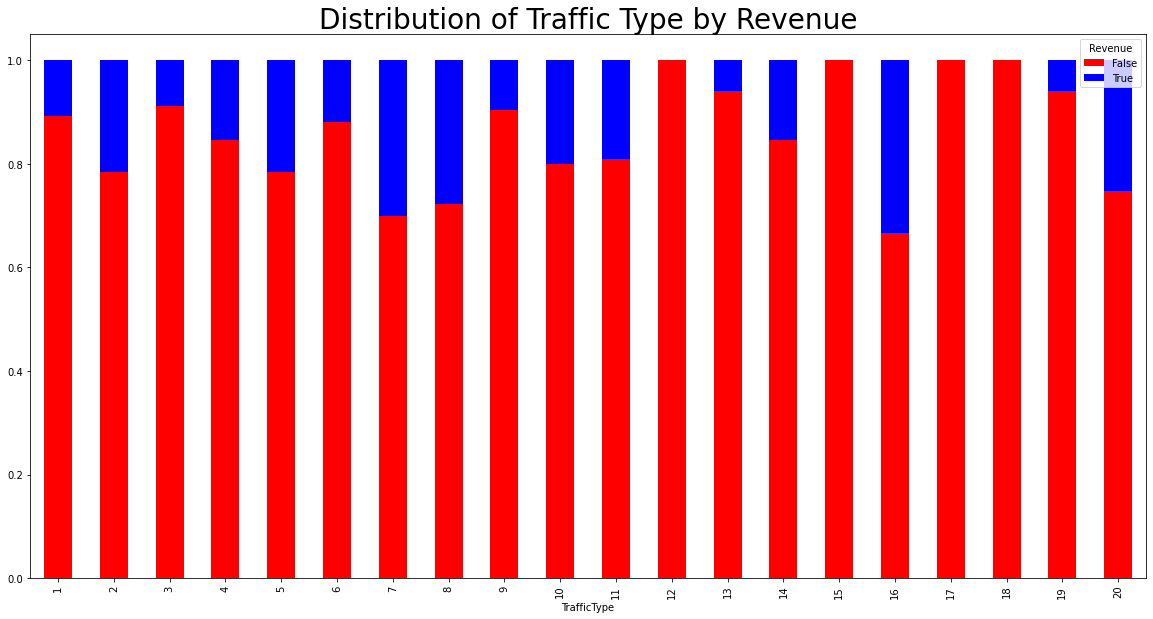

In [49]:
#distribution of TrafficType by revenue 
OSHIdf = pd.crosstab(OSHIdf['TrafficType'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Traffic Type by Revenue', fontsize = 28)
plt.show()

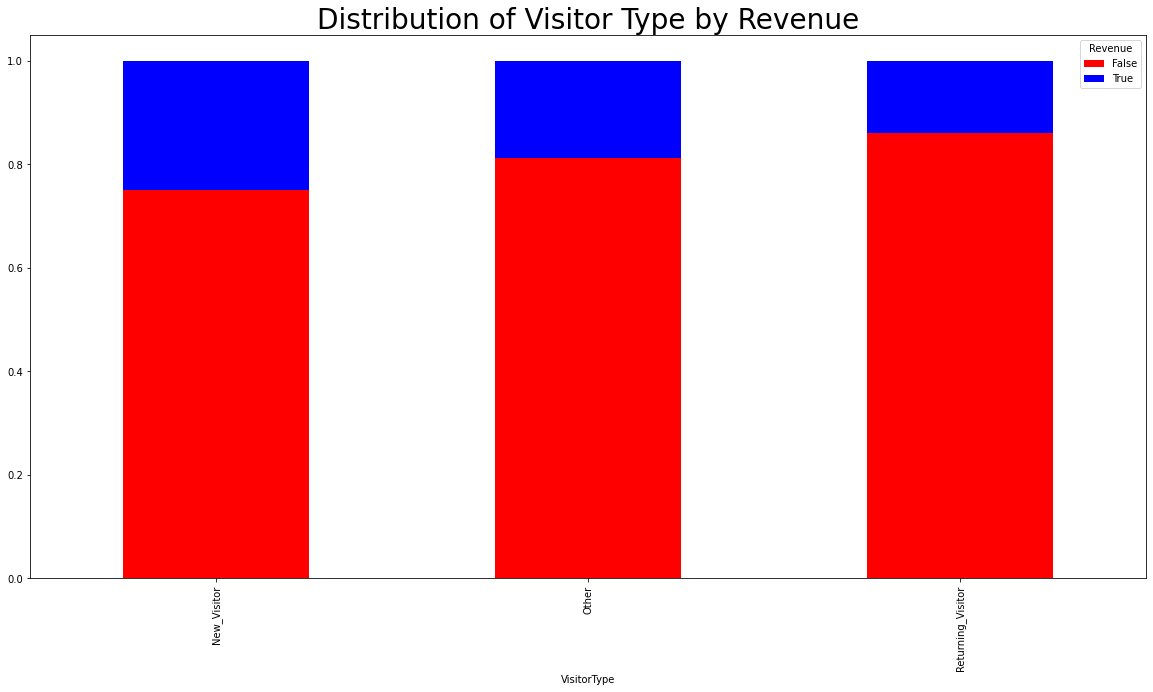

In [51]:
#distribution of VisitorType by revenue 
OSHIdf = pd.crosstab(OSHIdf['VisitorType'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Visitor Type by Revenue', fontsize = 28)
plt.show()

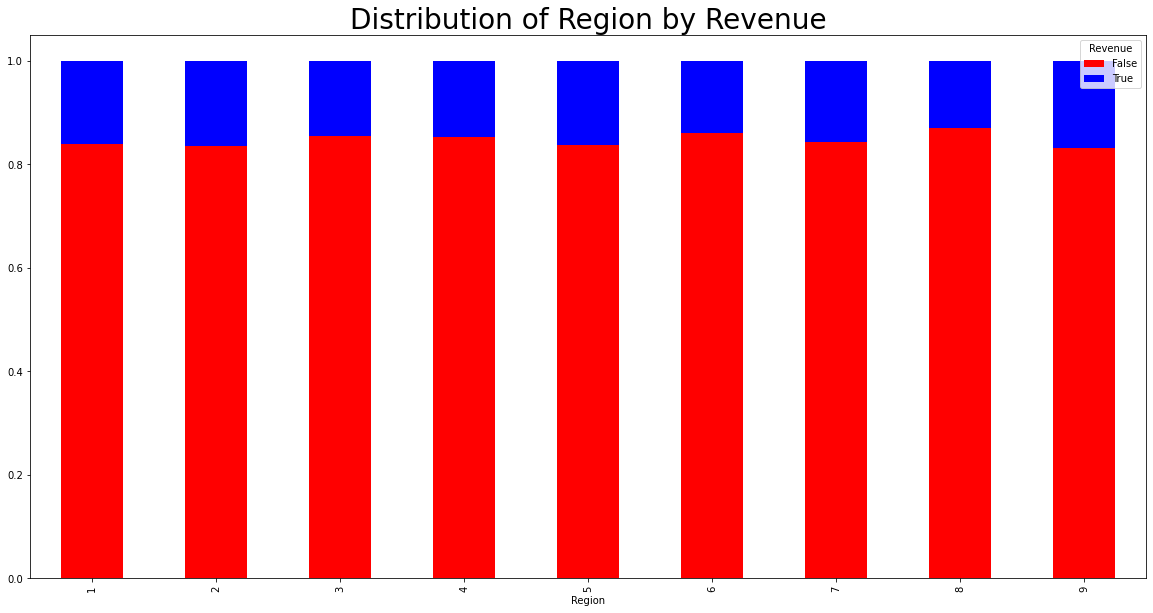

In [53]:
#Distribution of Region by Revenue
OSHIdf = pd.crosstab(OSHIdf['Region'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Region by Revenue', fontsize = 28)
plt.show()

# Multivariate Analysis 

Text(0.5, 1.0, 'Month vs BounceRates wrt to Reveneue')

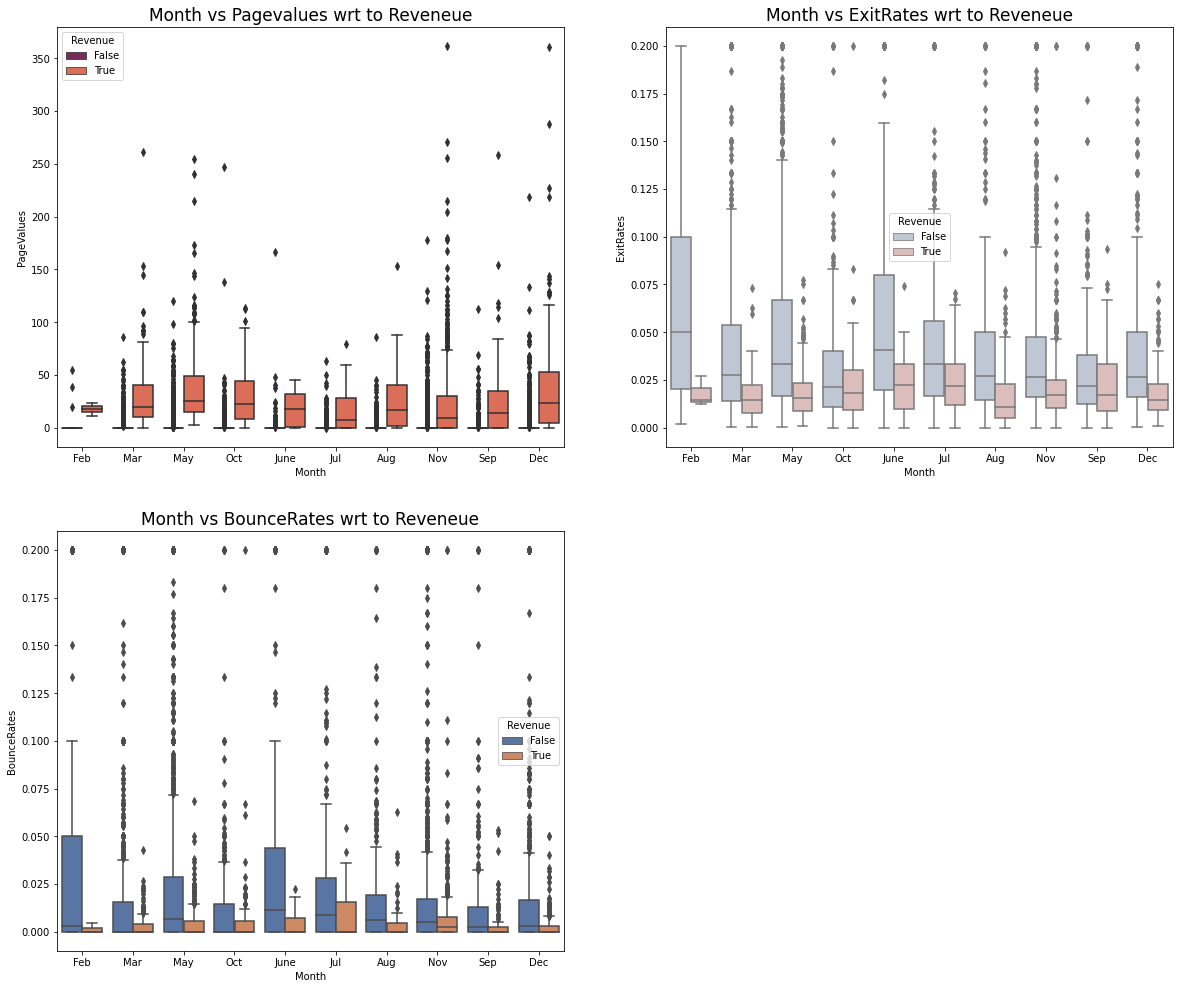

In [56]:
#Month vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('Month vs Pagevalues wrt to Reveneue', fontsize =17)

#Month vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('Month vs ExitRates wrt to Reveneue', fontsize =17)

#Month vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('Month vs BounceRates wrt to Reveneue', fontsize =17)

Text(0.5, 1.0, 'VisitorType vs BounceRates wrt to Reveneue')

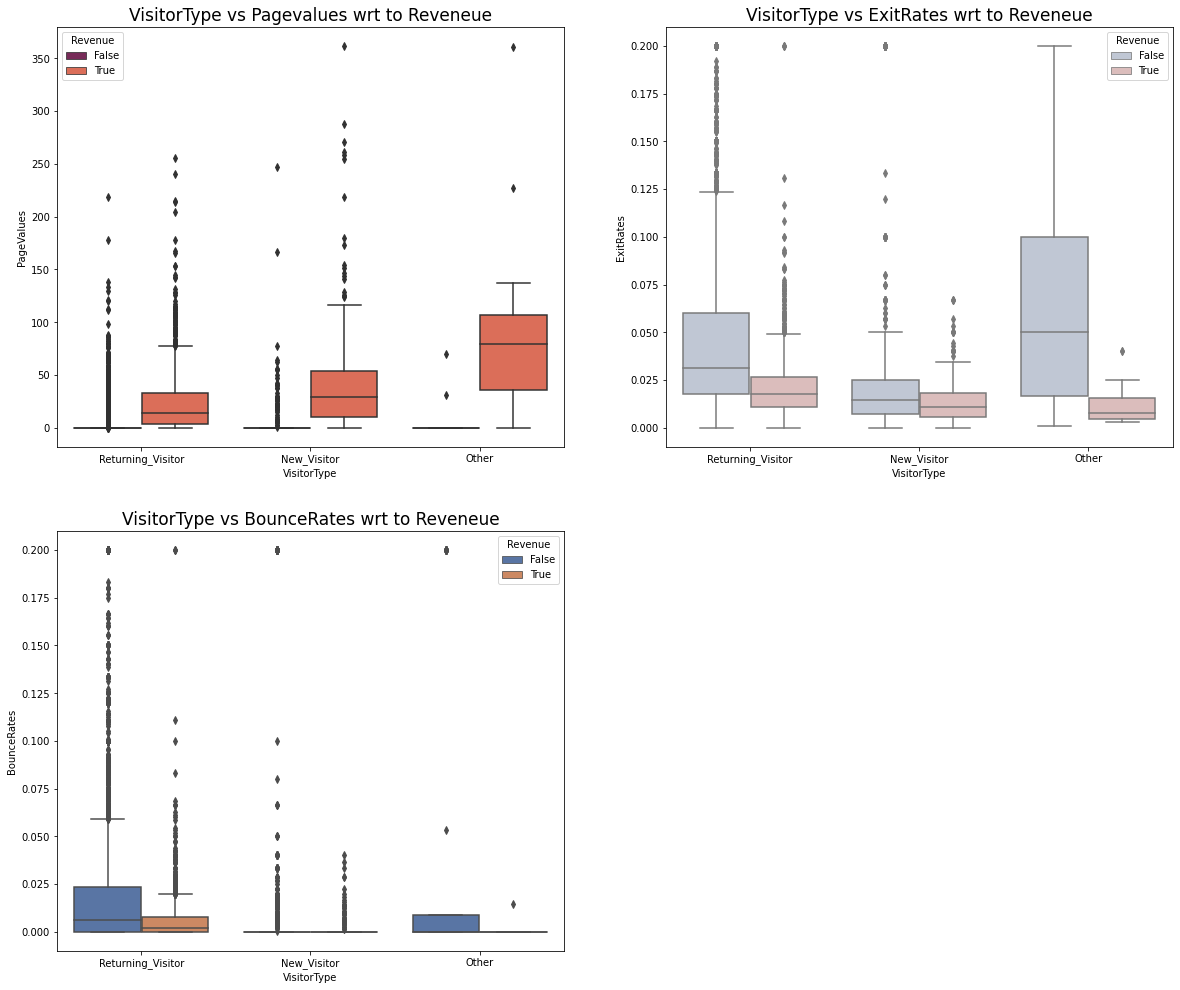

In [58]:
#VisitorType vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('VisitorType vs Pagevalues wrt to Reveneue', fontsize =17)

#VisitorType vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('VisitorType vs ExitRates wrt to Reveneue', fontsize =17)

#VisitorType vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('VisitorType vs BounceRates wrt to Reveneue', fontsize =17)

Text(0.5, 1.0, 'Region vs BounceRates wrt to Reveneue')

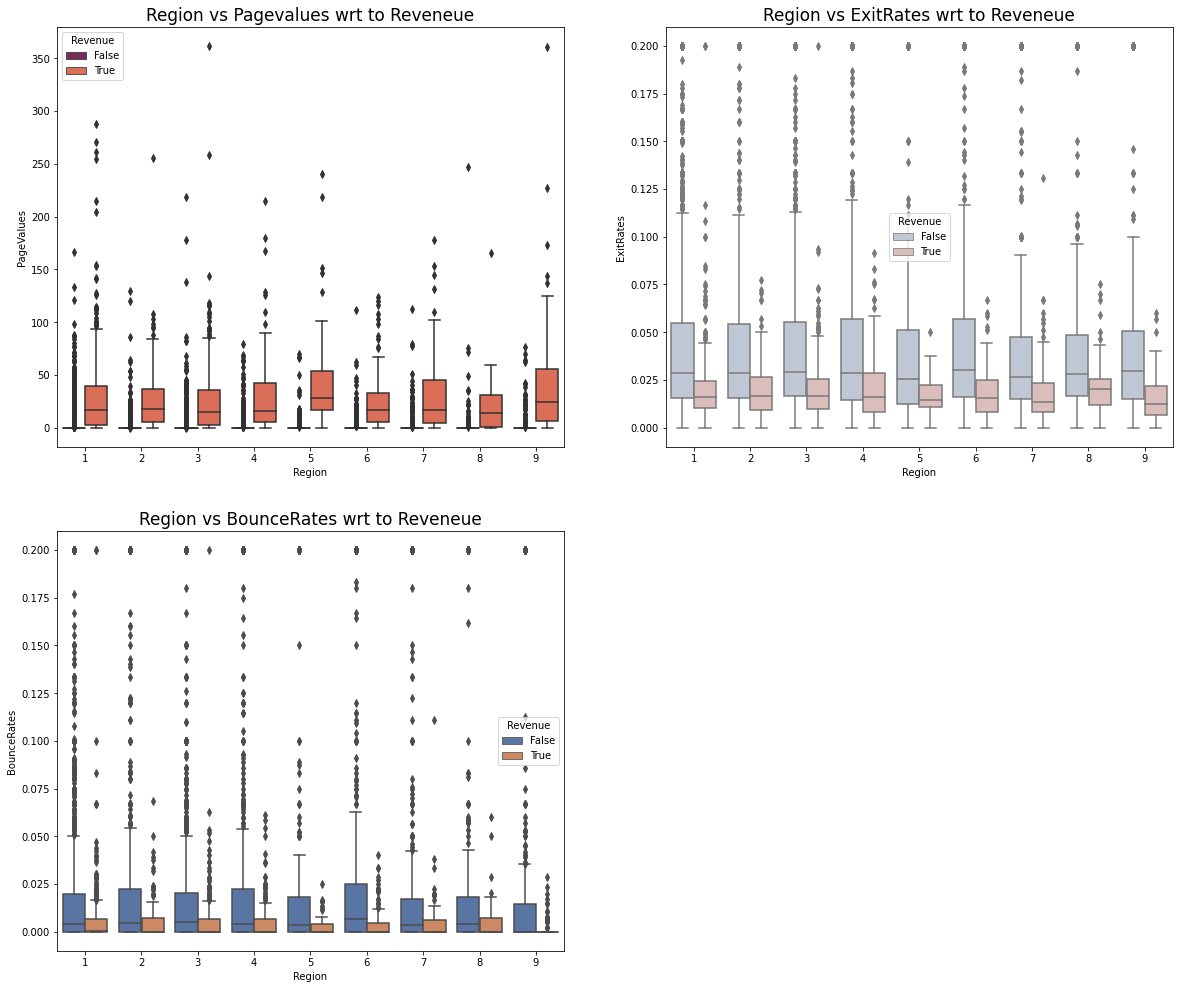

In [60]:
#Region vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('Region vs Pagevalues wrt to Reveneue', fontsize =17)

#Region vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('Region vs ExitRates wrt to Reveneue', fontsize =17)

#Region vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('Region vs BounceRates wrt to Reveneue', fontsize =17)

In [ ]:
# Normalization 

In [ ]:
#Administrative 
sns.distplot(OSHIdf['Administrative'], bins = 30)

In [ ]:
sorted_Administrative = np.sort(OSHIdf["Administrative"], axis = 0)
scaled_Administrative = (sorted_Administrative - sorted_Administrative.mean())/sorted_Administrative.std()
scaled_Administrative =np.reshape(scaled_Administrative , (12330,))
#Generating some normal data in order to compare it with the actual distribution 
normal_Administrative_numbers = np.random.normal(loc = 0, scale = 1, size = np.size(scaled_Administrative))
normal_Administrative_numbers = np.sort(normal_Administrative_numbers)

In [ ]:
#plot a histogram to see how the actual distribution is close to normal distribution
plt.figure(figsize=(9, 6))
plt.hist([scaled_Administrative,normal_Administrative_numbers], label = ["Adminstrative", "Normal"])
plt.xlabel('bins')
plt.ylabel('counts')
plt.legend(loc= 'best')
ax = plt.gca()

ax.grid(False)

In [ ]:
stats.kstest(scaled_Administrative, 'norm')
#We should reject null hypothesis

###  Matrix of features and the dependent variable vector

In [6]:
#In python we need to distinguish between the matrix of features(Independent variables) and the dependent variable vector
OSHIX = OSHIdf.iloc[:,:-1]
OSHIX.shape

(12330, 17)

In [7]:
OSHIy = OSHIdf.iloc[:, 17:18]
OSHIy.shape

(12330, 1)

### Handling categorical features/creating dummy or indicator variables 

In [8]:
OSHIX = pd.get_dummies(OSHIX)

In [9]:
OSHIX.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [10]:
le_weekend = LabelEncoder()
OSHIX['Weekend_n'] = le_weekend.fit_transform(OSHIX['Weekend'])

In [11]:
OSHIX.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_n'],
      dtype='object')

In [12]:
# drop weekend column 
OSHIX_n = OSHIX.drop(['Weekend'], axis = 'columns')

In [13]:
print(OSHIX_n.dtypes)

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct                          uint8
Month_Sep                          uint8
VisitorType_New_

#### Encoding the dependent variable

In [14]:
labelencoder_y = LabelEncoder()
OSHIy = labelencoder_y.fit_transform(OSHIy)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
OSHIy.shape

(12330,)

In [16]:
print("shape of matrix of features:", OSHIX_n.shape)
print("shape of dependent variable vector:", OSHIy.shape)

shape of matrix of features: (12330, 28)
shape of dependent variable vector: (12330,)


### Correlation Matrix 

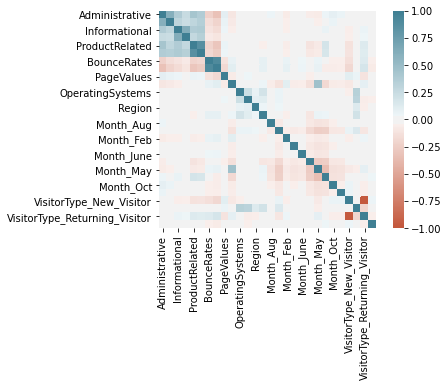

In [20]:
corr = OSHIX_n.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns. diverging_palette(20, 220, n=256),
    square = True)

In [21]:
#since the page related data are all highly correlated with their corresponding duration we will remove Adminstrative, Informational and product_related columns
OSHIX_n_collinearity = OSHIX_n.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 'columns')

In [22]:
OSHIX_n_collinearity.shape

(12330, 25)

# Feature Selection

###### Univariate statistics,selectkbest

In [23]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(OSHIX_n_collinearity, OSHIy)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(OSHIX_n_collinearity.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['feature', 'Score']
print(featureScores.nlargest(25, 'Score'))

                          feature          Score
2         ProductRelated_Duration  877404.339415
5                      PageValues  175126.808512
0         Administrative_Duration   41754.836841
1          Informational_Duration   35059.775770
18                      Month_Nov     223.548231
21        VisitorType_New_Visitor     115.339482
17                      Month_May      54.997108
6                      SpecialDay      53.797094
16                      Month_Mar      42.613274
3                     BounceRates      29.654336
4                       ExitRates      28.985072
13                      Month_Feb      26.961176
23  VisitorType_Returning_Visitor      19.183544
19                      Month_Oct      12.571184
12                      Month_Dec      11.624839
8                         Browser       8.873291
24                      Weekend_n       8.120464
15                     Month_June       6.432531
20                      Month_Sep       4.744843
9                   

In [24]:
# We will remove all the features whose score are below 3
OSHIX_n_collinearity_SelectKBest = OSHIX_n_collinearity.drop(['Month_Jul', 'VisitorType_Other','OperatingSystems', 'TrafficType','Month_Aug'], axis = 'columns')

In [25]:
OSHIX_n_collinearity_SelectKBest.shape

(12330, 20)

###### Univariate statistics,selectPercentile

In [ ]:
select = SelectPercentile(percentile = 70)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train is :{}'. format(X_train.shape))
print('X_train_selected.shape is:{}'.format(X_train_selected.shape))


###### ExtratreesClassifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(OSHIX, OSHIy)
features_importance = pd.Series(model.feature_importances_, index=OSHIX.columns)
features_importance.nlargest(20).plot(kind = 'barh')
plt.show

###### VarianceThreshhold

In [ ]:
constant_features=VarianceThreshold(threshold=0)
constant_features.fit(OSHIX, OSHIy)
constant_features.get_support()

#### Feature Scaling

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = OSHIdf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                                    square = True, ax=ax))

In [ ]:
"""sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

# Modeling 

### SVR

In [ ]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train,y_train)
y_pred = RFC_model.predict(X_test)

###### Evaluating model 

In [ ]:
print("Training Accuracy:", RFC_model.score(X_train, y_train))
print("Testing Accuracy:", RFC_model.score(X_test, y_test))

###### Confusing matrix 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

###### Classification report 

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

### Decision Tree 

In [ ]:
from sklearn import tree 
model_DT = tree.DecisionTreeClassifier()

In [ ]:
model_DT.fit(X_train, y_train)

In [ ]:
model_DT.score(OSHIX_n, OSHIy)

In [ ]:
y_pred = model_DT.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

##### Spliting of the data

X_train,X_test,y_train,y_test = train_test_split(OSHIX_n, OSHIy, test_size = 0.3, random_state = 0)

#checking the shapes
print("shape of xtrain:",X_train.shape)
print("shape of xtest:", X_test.shape)
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

OSHIX_n_collinearity.shape